In [1]:
# Import all the necessary tooling
import tensorflow as tf
import tensorflow_datasets as tfds

import pandas as pd
import numpy as np
import seaborn as sns 
# Matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

class_digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
print(x_train.shape)
print(y_train.shape)
print(x_train.dtype)
print(y_train.dtype)

(60000, 28, 28)
(60000,)
float64
uint8


In [2]:
def create_linechart(result_fit):
    # Generate a line chart of the training process
    history = result_fit.history
    epochs = range(1, len(history['loss']) + 1)

    plt.figure(figsize=(12, 6))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['loss'], 'bo-', label='Training loss')
    plt.plot(epochs, history['val_loss'], 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['accuracy'], 'bo-', label='Training accuracy')
    plt.plot(epochs, history['val_accuracy'], 'ro-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def create_Confusion_matrix(y_tests, predictions, labels):
    # Convert predicted labels to integers (assuming categorical labels)
    y_pred = np.argmax(predictions, axis=1)


    c_m = confusion_matrix(y_tests, y_pred)

    # Setting default size of the plot
    # Setting default fontsize used in the plot
    plt.rcParams['figure.figsize'] = (10.0, 9.0)
    plt.rcParams['font.size'] = 20


    # Implementing visualization of Confusion Matrix
    display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)


    # Plotting Confusion Matrix
    # Setting colour map to be used
    display_c_m.plot(cmap='OrRd', xticks_rotation=25)
    # Other possible options for colour map are:

    # Setting fontsize for xticks and yticks
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)


    # Giving name to the plot
    plt.title('Confusion Matrix', fontsize=24)


    # Saving plot
    plt.savefig('confusion_matrix.png', transparent=True, dpi=500)


    # Showing the plot
    plt.show()

In [65]:
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(3, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

auroc_metric = tf.keras.metrics.AUC(
    num_thresholds=200,
    curve='ROC',
    summation_method='interpolation',
    multi_label=False,
)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 714us/step - accuracy: 0.4554 - loss: 1.6674 - val_accuracy: 0.6905 - val_loss: 0.9515
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.6824 - loss: 0.9596 - val_accuracy: 0.7358 - val_loss: 0.8273
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.7183 - loss: 0.8734 - val_accuracy: 0.7483 - val_loss: 0.7967
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step - accuracy: 0.7327 - loss: 0.8286 - val_accuracy: 0.7607 - val_loss: 0.7656
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.7443 - loss: 0.8043 - val_accuracy: 0.7772 - val_loss: 0.7386
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.7580 - loss: 0.7903 - val_accuracy: 0.7900 - val_loss: 0.7086
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.7760 - loss: 0.7502 - val_accuracy: 0.7960 - val_loss: 0.6883
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.7796 -

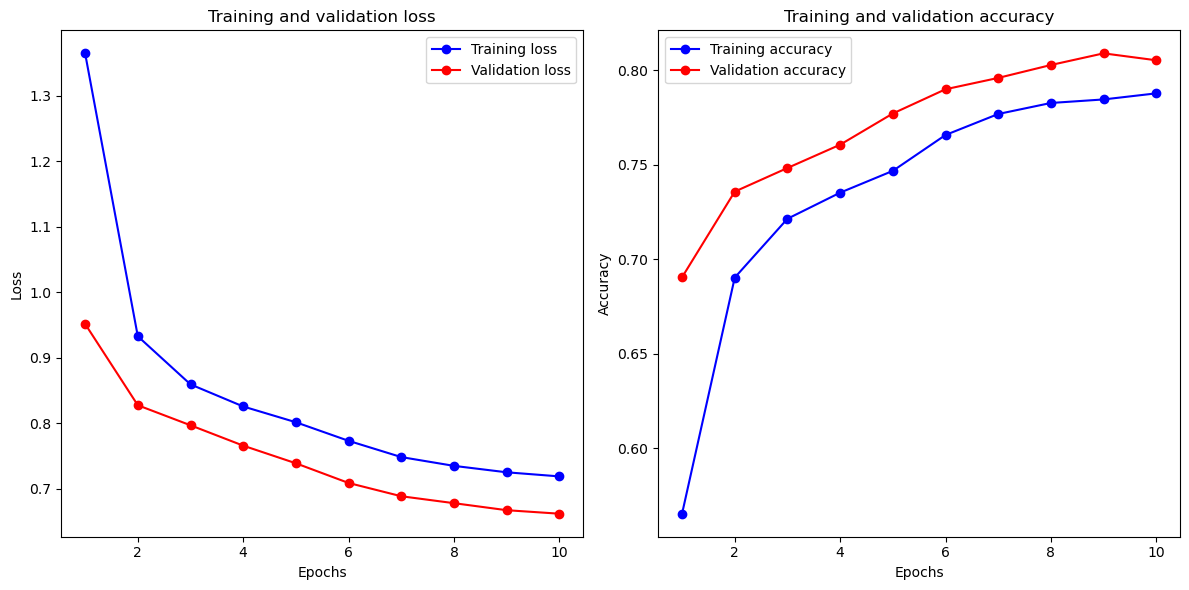

In [66]:
# Evaluate
# Use the model for prediction
result_fit = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

create_linechart(result_fit=result_fit)

### Configuratie:

Resultaat: 
1 Hidden layer - Relu formule - 3 neuronen
1 output layer - 10 neuronen en softmax

Training nauwkeurigheid:  77.3 procent, Loss functie: 0.735
Test: Nauwkeurigheid: 77.3 procent, Loss functie 0.735

## Tweede poging configuratie:

Resultaat: 
1 Hidden layer - Relu formule - 9 neuronen
1 output layer - 10 neuronen en softmax

In [67]:
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(9, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

# Evaluate
# Use the model for prediction
result_fit = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 701us/step - accuracy: 0.6916 - loss: 1.0037 - val_accuracy: 0.9150 - val_loss: 0.2895
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.9026 - loss: 0.3363 - val_accuracy: 0.9258 - val_loss: 0.2657
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - accuracy: 0.9132 - loss: 0.3045 - val_accuracy: 0.9293 - val_loss: 0.2530
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.9148 - loss: 0.2967 - val_accuracy: 0.9267 - val_loss: 0.2521
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.9218 - loss: 0.2754 - val_accuracy: 0.9323 - val_loss: 0.2360
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.9219 - loss: 0.2692 - val_accuracy: 0.9283 - val_loss: 0.2384
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.9241 - loss: 0.2599 - val_accuracy: 0.9328 - val_loss: 0.2311
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.9274 -

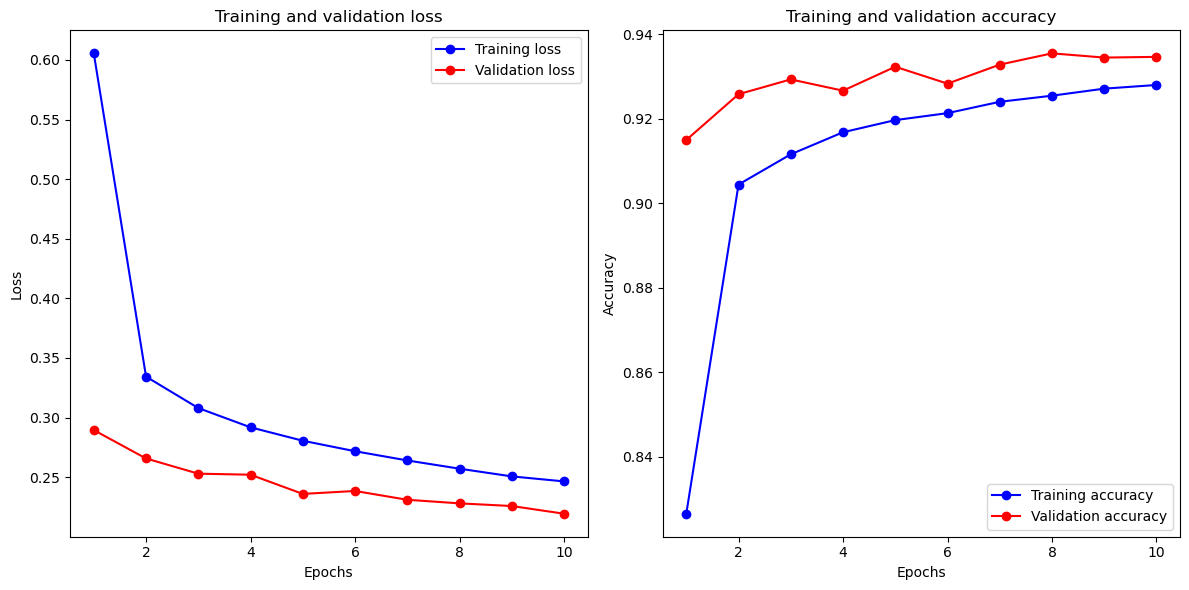

In [69]:
create_linechart(result_fit=result_fit)

### Resultaat:

Training: 92 procent, loss 0.27

Test: 92 procent, loss 0.27.

Conclusie, het aantal neuronen vergroten, zorgt voor een grotere nauwkeurigheid in ons model.

In [70]:
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(128, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

# Evaluate
# Use the model for prediction
result_fit = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8709 - loss: 0.4580 - val_accuracy: 0.9658 - val_loss: 0.1199
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9614 - loss: 0.1274 - val_accuracy: 0.9728 - val_loss: 0.0959
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9741 - loss: 0.0828 - val_accuracy: 0.9755 - val_loss: 0.0835
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9826 - loss: 0.0602 - val_accuracy: 0.9762 - val_loss: 0.0839
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9862 - loss: 0.0452 - val_accuracy: 0.9763 - val_loss: 0.0804
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9891 - loss: 0.0355 - val_accuracy: 0.9770 - val_loss: 0.0798
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9920 - loss: 0.0273 - val_accuracy: 0.9805 - val_loss: 0.0727
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9942 - loss: 0.0213 - 

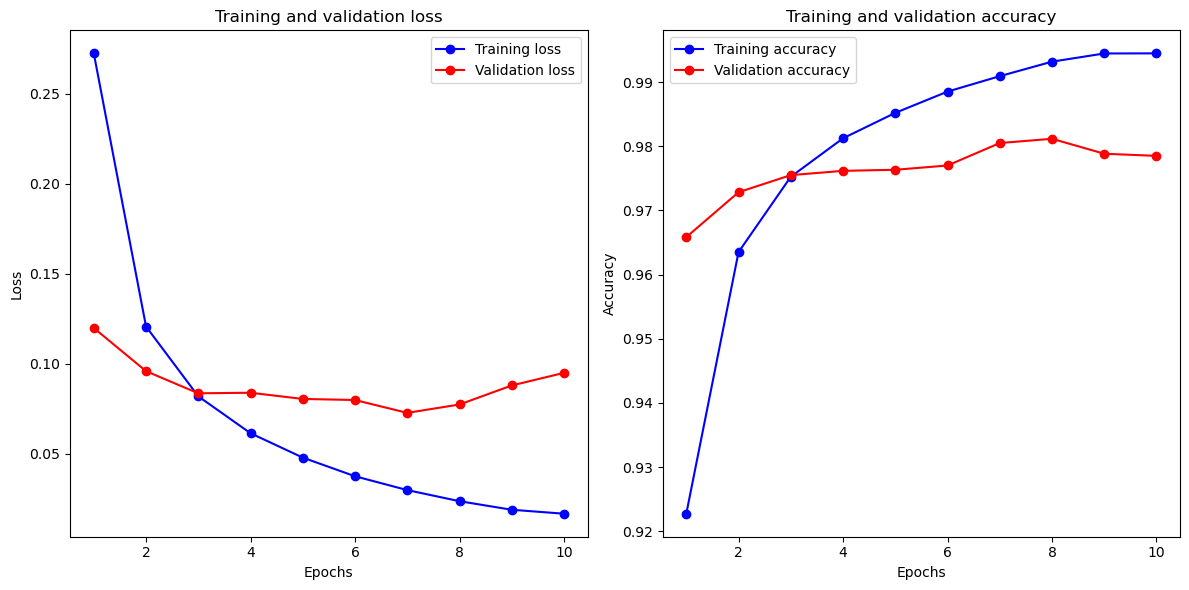

In [71]:
create_linechart(result_fit=result_fit)

Die nauwkeurigheid stijgt naar 97 procent als het aantal neuronen naar 128 omhoog gaat. Met een waarde verlies van 0.07

Er overfitting met een verschil van 1.2 procent verschil.

Vooral na een epoch rate van 3 wordt dit verschil groter.

Maatregelen om dit tegen te gaan:
- Kleinere dataset,
- Lagere epoch.
- Een drop-out layer toepassen.

30000
Epoch 1/10


c:\Users\Xin20\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8489 - loss: 0.5471 - val_accuracy: 0.9442 - val_loss: 0.1911
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9505 - loss: 0.1650 - val_accuracy: 0.9588 - val_loss: 0.1378
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9692 - loss: 0.1108 - val_accuracy: 0.9661 - val_loss: 0.1139
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9758 - loss: 0.0824 - val_accuracy: 0.9671 - val_loss: 0.1118
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9830 - loss: 0.0589 - val_accuracy: 0.9667 - val_loss: 0.1093
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9869 - loss: 0.0448 - val_accuracy: 0.9704 - val_loss: 0.1072
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9908 - loss: 0.0330 - val_accuracy: 0.9703 - val_loss: 0.1002
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9936 - loss: 0.0247 - val_accuracy: 0.9728 - val_

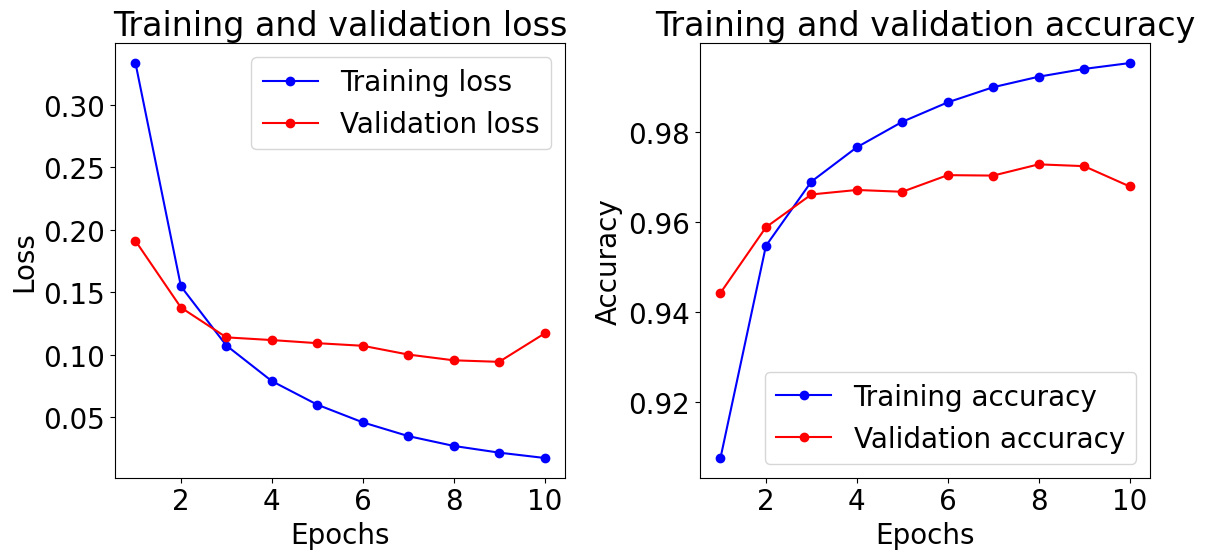

In [129]:
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()


#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

x_smaller_training_dataset = x_train[:30000]
y_smaller_training_dataset = y_train[:30000]
x_smaller_test_dataset = x_test
y_smaller_test_dataset = y_test

print(len(y_smaller_training_dataset))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(128, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

# Evaluate
# Use the model for prediction
result_fit = model.fit(x_smaller_training_dataset, y_smaller_training_dataset, validation_data=(x_test, y_test), epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_smaller_test_dataset, y_smaller_test_dataset, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

create_linechart(result_fit=result_fit)
predictions = model.predict(x_test)
create_Confusion_matrix(y_test, predictions, class_digits)

Conclusie:
 - Een kleinere dataset zorgt voor minder grotere nauwkeurigheid in ons model. Ten opzichte van testen met de oorspronkelijke grootte, 60000.
 - Daarnaast is er ook sprake van overfitting, doordat de trainings nauwkeurigheid groter is dan de validatie nauwkeurigheid.

c:\Users\Xin20\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8711 - loss: 0.4572 - val_accuracy: 0.9653 - val_loss: 0.1255
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9626 - loss: 0.1279 - val_accuracy: 0.9708 - val_loss: 0.0983
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9748 - loss: 0.0864 - val_accuracy: 0.9753 - val_loss: 0.0861
313/313 - 0s - 636us/step - accuracy: 0.9722 - loss: 0.0946
Loss =  0.09456784278154373
Accuracy =  0.9721999764442444
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step


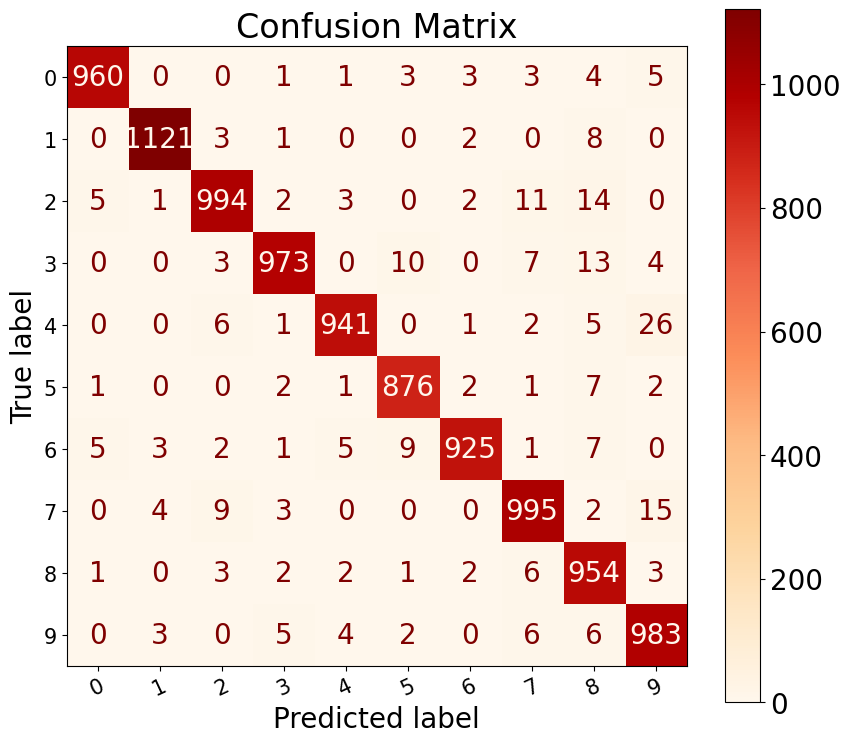

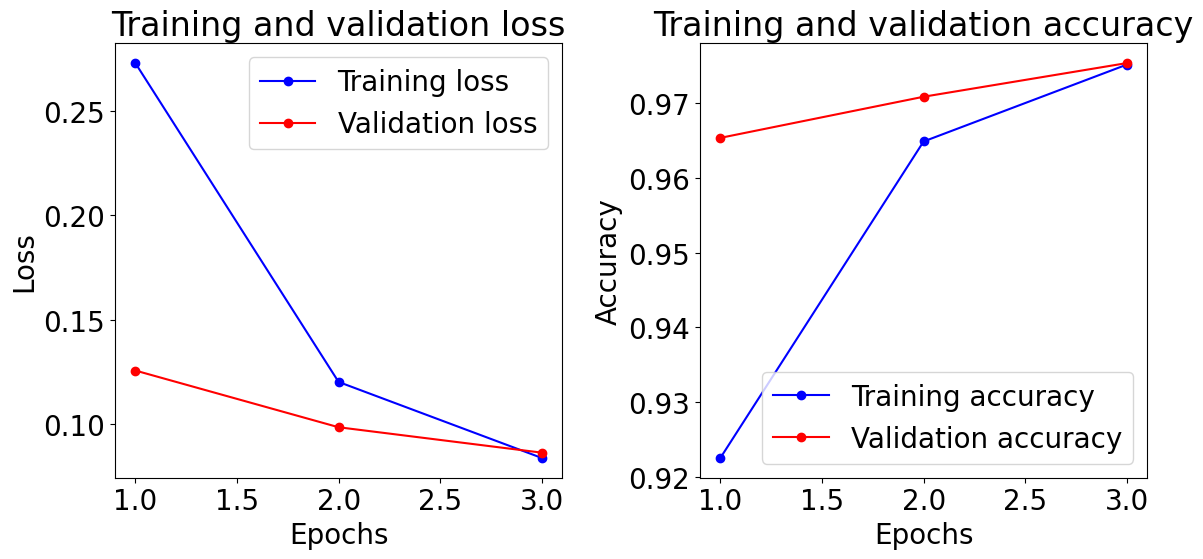

In [4]:
## Poging met lagere epoch rate
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(128, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

# Evaluate
# Use the model for prediction
result_fit = model.fit(x_train, y_train, epochs=3, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

predictions = model.predict(x_test)
create_Confusion_matrix(y_test, predictions, class_digits)
create_linechart(result_fit)

### Conclusie lagere epoch rate
Een lagere epoch rate kan ervoor zorgen dat overfitting verlaagt kan worden.

## Drop out layer.

60000
Epoch 1/10


c:\Users\Xin20\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8356 - loss: 0.5404 - val_accuracy: 0.9650 - val_loss: 0.1244
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9472 - loss: 0.1777 - val_accuracy: 0.9720 - val_loss: 0.0968
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9583 - loss: 0.1383 - val_accuracy: 0.9743 - val_loss: 0.0882
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9664 - loss: 0.1106 - val_accuracy: 0.9765 - val_loss: 0.0779
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9704 - loss: 0.0952 - val_accuracy: 0.9770 - val_loss: 0.0838
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9732 - loss: 0.0853 - val_accuracy: 0.9807 - val_loss: 0.0749
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9754 - loss: 0.0772 - val_accuracy: 0.9805 - val_loss: 0.0710
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9773 - loss: 0.0686 - val_accurac

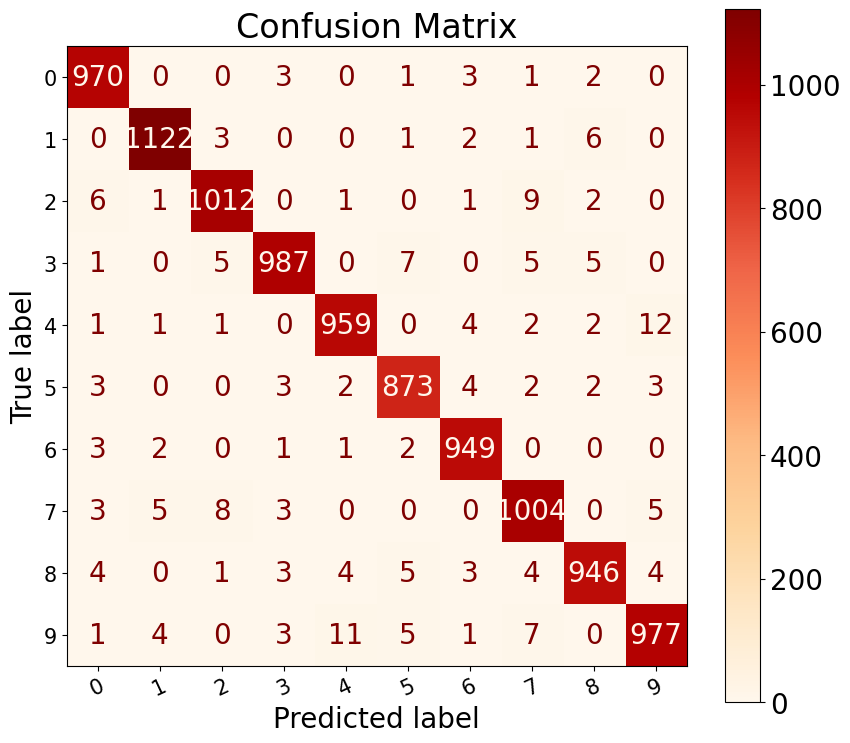

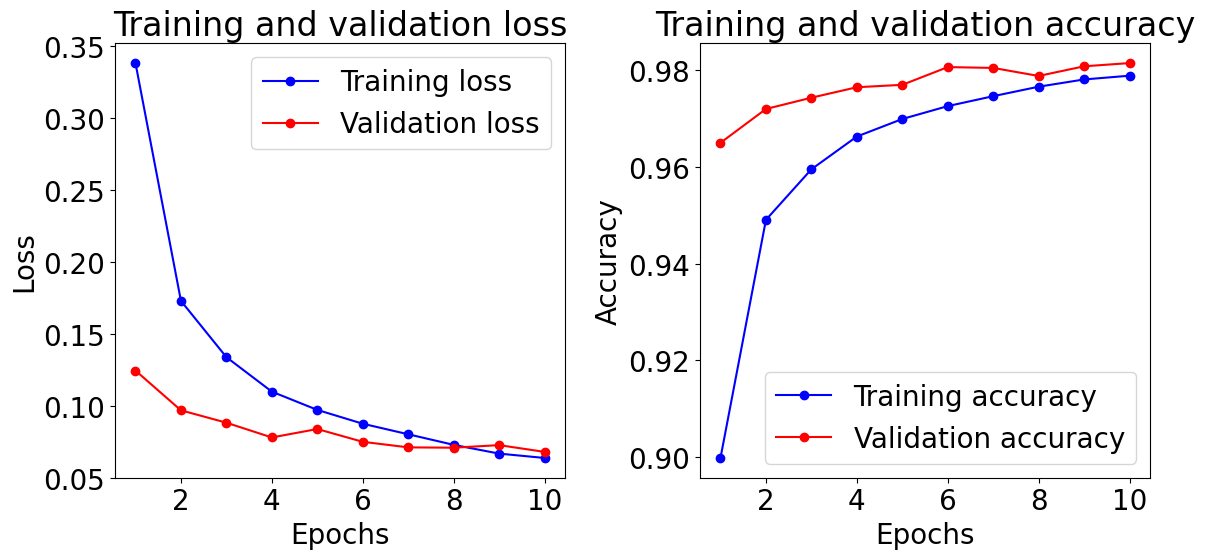

In [5]:
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()


#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

x_smaller_training_dataset = x_train
y_smaller_training_dataset = y_train
x_smaller_test_dataset = x_test
y_smaller_test_dataset = y_test

print(len(y_smaller_training_dataset))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

# Evaluate
# Use the model for prediction
result_fit = model.fit(x_smaller_training_dataset, y_smaller_training_dataset, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_smaller_test_dataset, y_smaller_test_dataset, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

predictions = model.predict(x_test)
create_Confusion_matrix(y_test, predictions, class_digits)
create_linechart(result_fit=result_fit)

Het toevoegen van een dropout layer, heeft ertoe geleidt dat het verschil tussen de validatie en trainings nauwkeurigheid dichter bij elkaar komen.

Een dropout of een andere vorm van regulatie algoritmes toepassen kan overfitting verlagen.

## Poging met hogere learning rate

De learning rate is in deze poging van 0.005 naar 1.0 gezet.

Epoch 1/10


c:\Users\Xin20\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 941us/step - accuracy: 0.1014 - loss: 2.5842 - val_accuracy: 0.0952 - val_loss: 2.4226
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.0999 - loss: 2.4040 - val_accuracy: 0.1050 - val_loss: 2.3803
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.1009 - loss: 2.4068 - val_accuracy: 0.0960 - val_loss: 2.4542
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - accuracy: 0.1035 - loss: 2.4169 - val_accuracy: 0.0952 - val_loss: 2.4224
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.1041 - loss: 2.4076 - val_accuracy: 0.0995 - val_loss: 2.3557
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - accuracy: 0.0992 - loss: 2.4097 - val_accuracy: 0.0978 - val_loss: 2.5002
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.0994 - loss: 2.4166 - val_accuracy: 0.0995 - val_loss: 2.4451
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.0988 - loss: 2.41

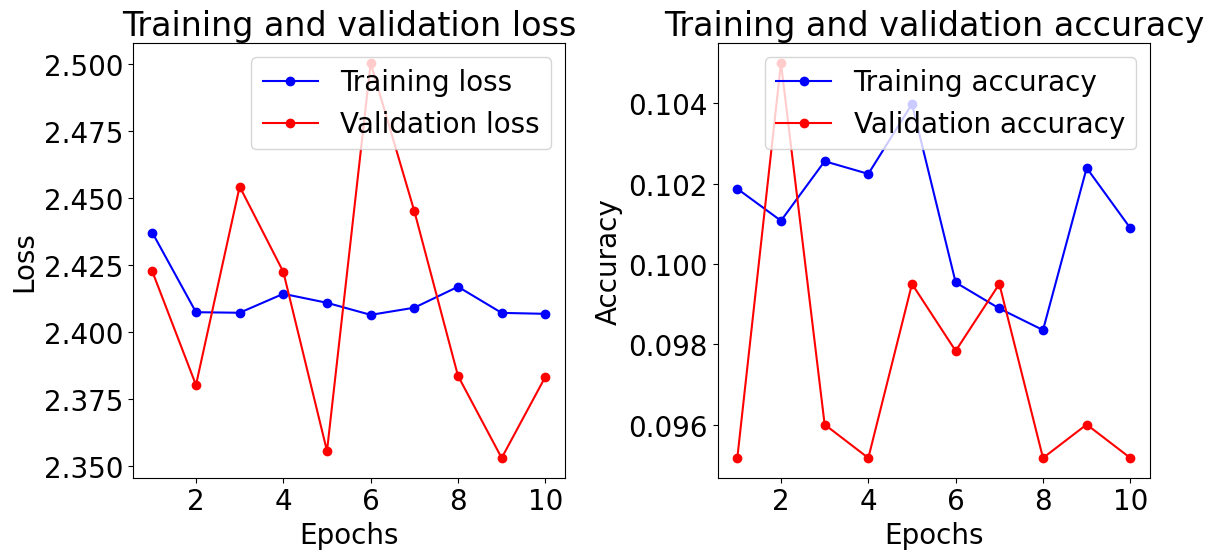

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step


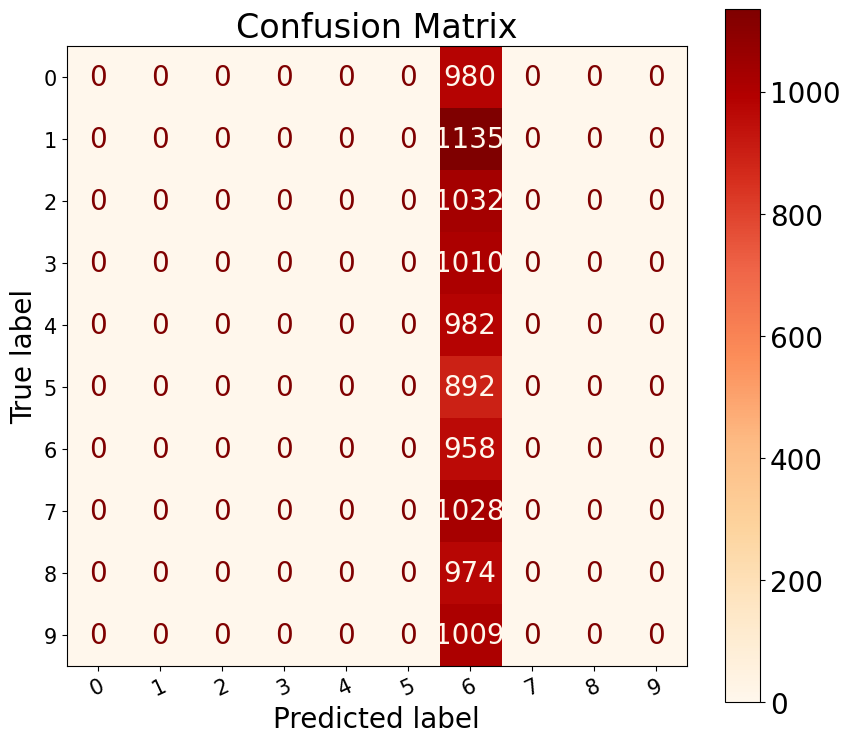

In [6]:
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(3, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd. === Getal is hoger.
adam = tf.keras.optimizers.Adam(learning_rate=1.0)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

# Evaluate
# Use the model for prediction
result_fit = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)
create_linechart(result_fit=result_fit)

predictions = model.predict(x_test)
create_Confusion_matrix(y_test, predictions, class_digits)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 797us/step - accuracy: 0.1032 - loss: 2.9586 - val_accuracy: 0.1050 - val_loss: 2.4017
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.0994 - loss: 2.4174 - val_accuracy: 0.1000 - val_loss: 2.3698
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.1059 - loss: 2.4082 - val_accuracy: 0.0952 - val_loss: 2.4195
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.1011 - loss: 2.4163 - val_accuracy: 0.0992 - val_loss: 2.4481
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.1006 - loss: 2.4101 - val_accuracy: 0.1113 - val_loss: 2.4116
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.1014 - loss: 2.4154 - val_accuracy: 0.0992 - val_loss: 2.3912
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.1019 - loss: 2.4058 - val_accuracy: 0.1050 - val_loss: 2.4438
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.0990 -

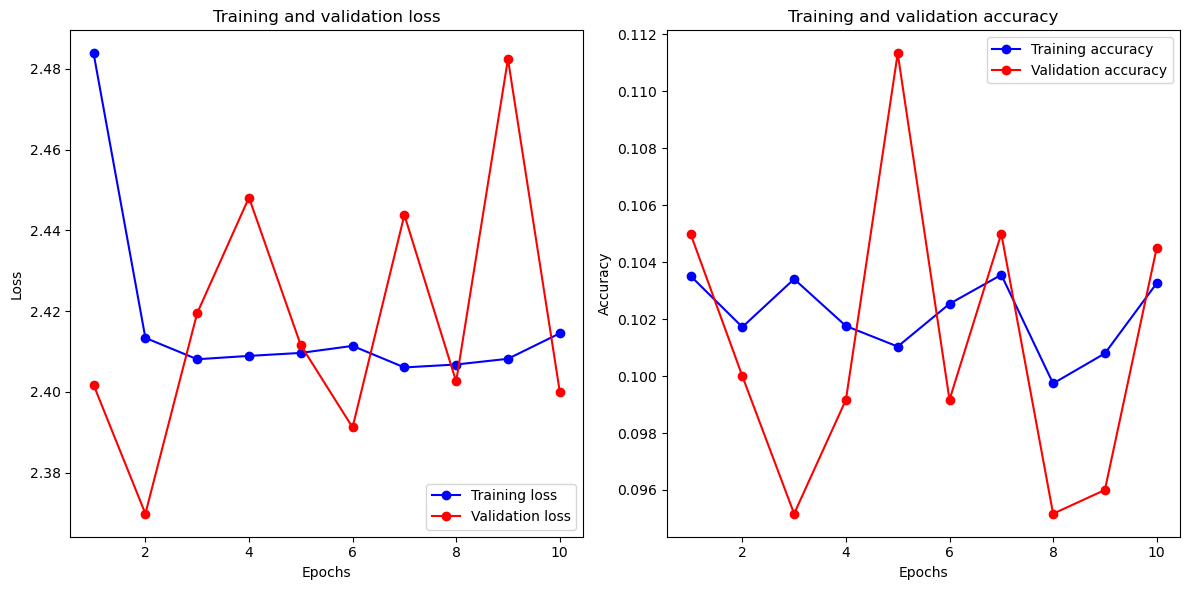

In [74]:
# My version met extra layers
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(3, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd. === Getal is hoger.
adam = tf.keras.optimizers.Adam(learning_rate=1.0)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

# Evaluate
# Use the model for prediction
result_fit = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)
create_linechart(result_fit=result_fit)

### Conclusie:

Een hogere learning rate leidt tot lagere nauwkeurigheid van het model. Dit leidt ook tot grotere value loss waarden

Dit kan ook niet opgelost worden door extra layers toe te voegen.